In [50]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [51]:
dataset = pd.read_csv('GOOG.csv',index_col="Date",parse_dates=True)

In [52]:
dataset.head()


,Open,High,Low,Close,Volume
Date,,,,,
2004-08-19,49.813286,51.835709,47.800831,49.982655,44871300
2004-08-20,50.316402,54.336334,50.062355,53.952770,22942800
2004-08-23,55.168217,56.528118,54.321388,54.495735,18342800
2004-08-24,55.412300,55.591629,51.591621,52.239193,15319700
2004-08-25,52.284027,53.798351,51.746044,52.802086,9232100


In [53]:
dataset.isna().any()

Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [54]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4061 entries, 2004-08-19 to 2020-10-05
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    4061 non-null   float64
 1   High    4061 non-null   float64
 2   Low     4061 non-null   float64
 3   Close   4061 non-null   float64
 4   Volume  4061 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 190.4 KB


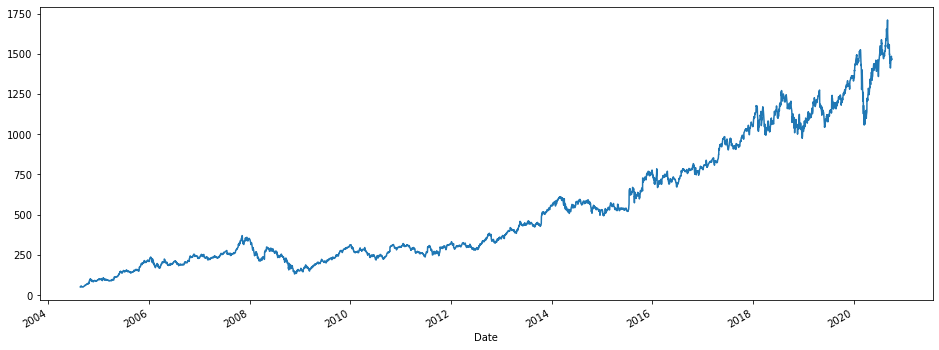

In [55]:
dataset['Open'].plot(figsize=(16,6))

In [56]:
# 7 day rolling mean
dataset.rolling(7).mean().head(20)

,Open,High,Low,Close,Volume
Date,,,,,
2004-08-19,NaN,NaN,NaN,NaN,NaN
2004-08-20,NaN,NaN,NaN,NaN,NaN
2004-08-23,NaN,NaN,NaN,NaN,NaN
2004-08-24,NaN,NaN,NaN,NaN,NaN
2004-08-25,NaN,NaN,NaN,NaN,NaN
2004-08-26,NaN,NaN,NaN,NaN,NaN
2004-08-27,52.731634,54.281540,51.472070,52.871823,1.772550e+07
2004-08-30,53.107369,54.383301,51.902599,52.990663,1.206123e+07
2004-08-31,53.199168,54.001162,52.020727,52.567962,9.489571e+06


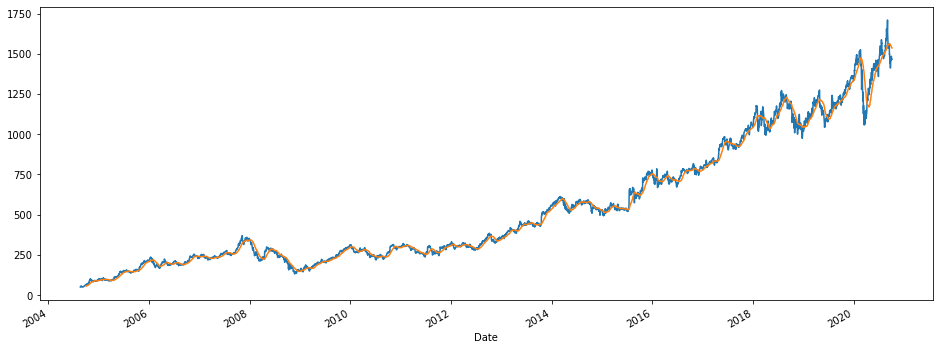

In [57]:
dataset['Open'].plot(figsize=(16,6))
dataset.rolling(window=30).mean()['Close'].plot()

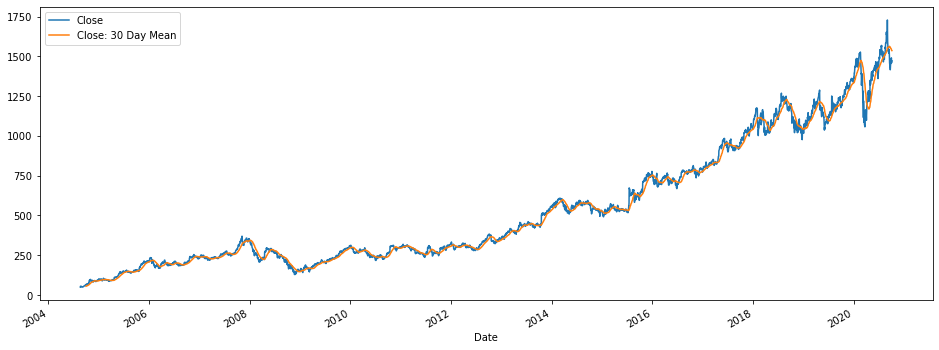

In [58]:
dataset['Close: 30 Day Mean'] = dataset['Close'].rolling(window=30).mean()
dataset[['Close','Close: 30 Day Mean']].plot(figsize=(16,6))

In [68]:
training_set=dataset['Open']
type(training_set)

pandas.core.series.Series

In [75]:
training_set= training_set[:int(len(training_set)*(4/5))]
training_set=pd.DataFrame(training_set)
type(training_set)
training_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2078 entries, 2004-08-19 to 2012-11-16
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2078 non-null   float64
dtypes: float64(1)
memory usage: 32.5 KB


In [60]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [79]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [80]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [81]:
# Initialising the RNN
regressor = Sequential()

In [82]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))



In [83]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
3188/3188 [==============================] - 26s 8ms/step - loss: 0.0104
Epoch 2/100
3188/3188 [==============================] - 22s 7ms/step - loss: 0.0022
Epoch 3/100
3188/3188 [==============================] - 23s 7ms/step - loss: 0.0020
Epoch 4/100
3188/3188 [==============================] - 24s 7ms/step - loss: 0.0020
Epoch 5/100
3188/3188 [==============================] - 24s 7ms/step - loss: 0.0017
Epoch 6/100
3188/3188 [==============================] - 23s 7ms/step - loss: 0.0018
Epoch 7/100
3188/3188 [==============================] - 23s 7ms/step - loss: 0.0017
Epoch 8/100
3188/3188 [==============================] - 24s 7ms/step - loss: 0.0017
Epoch 9/100
3188/3188 [==============================] - 24s 7ms/step - loss: 0.0014
Epoch 10/100
3188/3188 [==============================] - 24s 7ms/step - loss: 0.0014
Epoch 11/100
3188/3188 [==============================] - 24s 7ms/step - loss: 0.0015
Epoch 12/100
3188/3188 [==============================] - 24s 7

3188/3188 [==============================] - 23s 7ms/step - loss: 4.9191e-04
Epoch 93/100
3188/3188 [==============================] - 22s 7ms/step - loss: 5.6603e-04
Epoch 94/100
3188/3188 [==============================] - 23s 7ms/step - loss: 5.0934e-04
Epoch 95/100
3188/3188 [==============================] - 22s 7ms/step - loss: 5.5936e-04
Epoch 96/100
3188/3188 [==============================] - 23s 7ms/step - loss: 5.8946e-04
Epoch 97/100
3188/3188 [==============================] - 24s 8ms/step - loss: 5.4141e-04
Epoch 98/100
3188/3188 [==============================] - 24s 8ms/step - loss: 5.6189e-04
Epoch 99/100
3188/3188 [==============================] - 25s 8ms/step - loss: 4.9255e-04
Epoch 100/100
3188/3188 [==============================] - 28s 9ms/step - loss: 5.3744e-04


In [84]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('GOOG.csv',index_col="Date",parse_dates=True)



array([[  51.83570862],
       [  54.33633423],
       [  56.52811813],
       ...,
       [1499.04003906],
       [1483.19995117],
       [1485.86999512]])

In [85]:
dataset_test= dataset['Open']
dataset_test= dataset_test[int(len(dataset_test)*4/5):]
dataset_test.head()

Date
2017-07-14    952.000000
2017-07-17    957.000000
2017-07-18    953.000000
2017-07-19    967.840027
2017-07-20    975.000000
Name: Open, dtype: float64

In [48]:
#dataset_test.values

array([ 952.        ,  957.        ,  953.        ,  967.84002686,
        975.        ,  962.25      ,  972.2199707 ,  953.80999756,
        954.67999268,  951.7800293 ,  929.40002441,  941.89001465,
        932.38000488,  928.60998535,  930.34002686,  926.75      ,
        929.05999756,  927.09002686,  920.60998535,  917.54998779,
        907.9699707 ,  922.5300293 ,  924.22998047,  925.28997803,
        925.7800293 ,  910.30999756,  910.        ,  912.7199707 ,
        921.92999268,  928.65997314,  923.48999023,  916.        ,
        905.09997559,  920.04998779,  931.76000977,  941.13000488,
        933.08001709,  930.15002441,  931.72998047,  936.48999023,
        934.25      ,  932.59002686,  930.65997314,  931.25      ,
        924.65997314,  920.01000977,  917.41998291,  922.97998047,
        933.        ,  927.75      ,  925.45001221,  923.7199707 ,
        927.73999023,  941.35998535,  952.        ,  959.97998047,
        954.        ,  957.        ,  955.48999023,  966.70001

In [164]:
real_stock_price= dataset_test[60:]

In [111]:
# Getting the predicted stock price of 2017
inputs = dataset_test.values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [165]:
real_stock_price=pd.DataFrame(real_stock_price)
real_stock_price

,Open
Date,
2017-10-09,980.000000
2017-10-10,980.000000
2017-10-11,973.719971
2017-10-12,987.450012
2017-10-13,992.000000
...,...
2020-09-29,1470.390015
2020-09-30,1466.800049
2020-10-01,1484.270020


In [133]:
predicted_stock_price=pd.DataFrame(predicted_stock_price)
predicted_stock_price.rename(columns={'0':"Open2"})
predicted_stock_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753 entries, 0 to 752
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       753 non-null    float32
dtypes: float32(1)
memory usage: 3.1 KB


In [156]:
df3= predicted_stock_price[0]
df3.values

array([ 923.27075,  928.68506,  933.6646 ,  935.8742 ,  938.9496 ,
        942.8516 ,  946.1349 ,  948.1574 ,  949.6846 ,  950.06116,
        950.70325,  951.6906 ,  949.4794 ,  946.27435,  946.0047 ,
        951.92676,  959.0561 ,  963.99866,  966.85443,  969.11597,
        971.0842 ,  973.8171 ,  976.3032 ,  978.62885,  981.101  ,
        982.1178 ,  981.9217 ,  981.57245,  981.0698 ,  981.2271 ,
        983.39716,  983.8708 ,  983.4602 ,  984.8526 ,  986.8813 ,
        988.944  ,  992.563  ,  994.3736 ,  991.82227,  987.49115,
        983.92303,  979.54224,  976.55566,  977.8998 ,  982.72003,
        986.581  ,  988.81586,  990.7735 ,  992.1966 ,  994.46344,
        998.424  , 1003.32074, 1006.92676, 1008.19507, 1008.06464,
       1007.5932 , 1007.44116, 1007.01935, 1005.9594 , 1005.1815 ,
       1006.8426 , 1012.0317 , 1017.79956, 1022.6198 , 1026.7521 ,
       1028.6024 , 1029.9762 , 1031.6007 , 1035.8704 , 1040.8026 ,
       1044.2399 , 1046.9224 , 1049.2847 , 1053.3193 , 1059.24

In [166]:
real_stock_price.insert(1, 'Open2', df3.values, True)

In [167]:
real_stock_price

,Open,Open2
Date,,
2017-10-09,980.000000,923.270752
2017-10-10,980.000000,928.685059
2017-10-11,973.719971,933.664612
2017-10-12,987.450012,935.874207
2017-10-13,992.000000,938.949585
...,...,...
2020-09-29,1470.390015,1156.546631
2020-09-30,1466.800049,1158.737671
2020-10-01,1484.270020,1159.065186


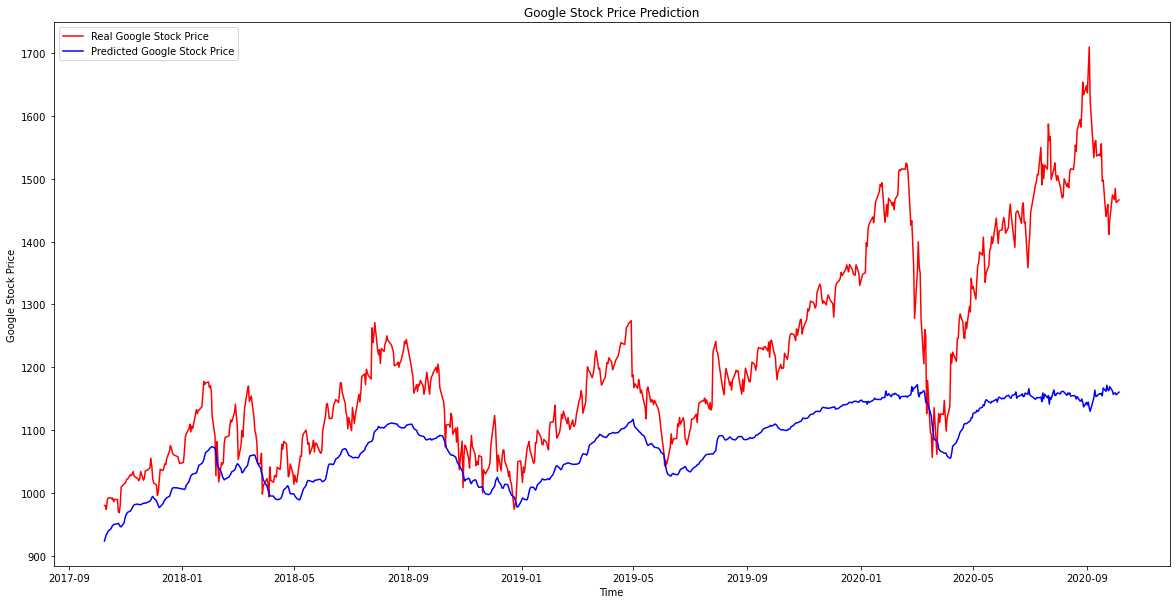

In [182]:

# Visualising the results
plt.figure(figsize=(20,10))
plt.plot(real_stock_price['Open'], color = 'red', label = 'Real Google Stock Price')
plt.plot(real_stock_price['Open2'], color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()
